# Non-zero densities and temperatures

A Lagrangian for a nucleon field $\psi$ with a point-like chirally symmetric four-fermion interaction.

$$
\mathcal{L} = \bar{\psi}(i\gamma\partial - m)\psi + G\left\{(\bar{\psi}\psi)^2 + (\bar{\psi}i\gamma^5\vec{\tau}\psi)^2\right\}
$$

In [1]:
using Plots
using LaTeXStrings
using QuadGK  # 数値積分のためのパッケージ
using NLsolve

In [2]:
include("src/constants.jl")
include("src/original_NJL_model.jl")
include("src/quark_NJL_model.jl")

Nf_o, Nc_o, Lambda_o, G, m_o are global variables.
Nf, Nc, Lambda, Gs, Gv, m are global variables.


energy_dens (generic function with 1 method)

### Original NJL-model

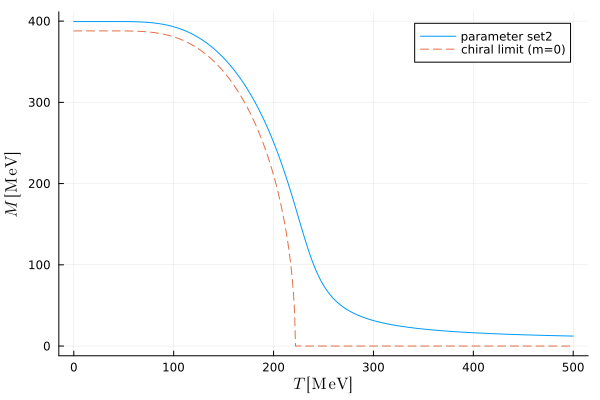

In [3]:
T = 0.0:500.0
plt = plot(T,  find_M.(T, 0.0);
    ylabel=L"M\ [\mathrm{MeV}]",
    xlabel=L"T\ [\mathrm{MeV}]",
    label="parameter set2"
)
m_o = 0.0
plot!(plt, T,  find_M.(T, 0.0);
    linestyle=:dash,
    label="chiral limit (m=0)"
)
m_o=5.6
display(plt)

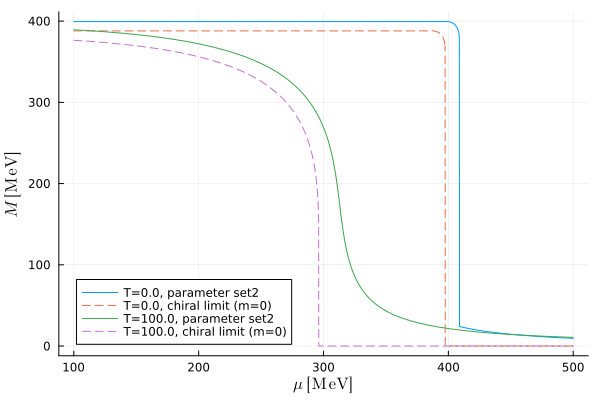

In [4]:
mu =1e2:1e-1:5e2

temperature= 0.0
m_o = 5.6  # MeV
plt = plot(mu, find_M.(temperature, mu);
    label=string("T=", temperature , ", parameter set2"),
    xlabel=L"\mu\ [\mathrm{MeV}]",
    ylabel=L"M\ [\mathrm{MeV}]",
)
m_o = 0.0  # MeV
plot!(plt, mu, find_M.(temperature, mu);
    label=string("T=",temperature,", chiral limit (m=0)"),
    linestyle=:dash,
)

temperature= 1e2
m_o = 5.6  # MeV
plot!(plt, mu, find_M.(temperature, mu);
    label=string("T=", temperature , ", parameter set2"),
)
m_o = 0.0  # MeV
plot!(plt, mu, find_M.(temperature, mu);
    label=string("T=",temperature,", chiral limit (m=0)"),
    linestyle=:dash,
)
m_o = 5.6
display(plt)

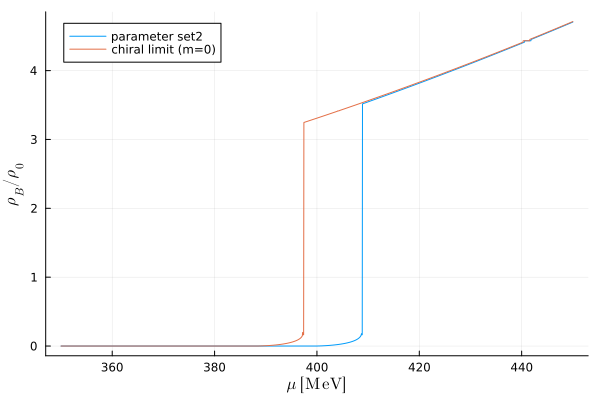

5.6

In [5]:
mu =3.5e2:5e-2:4.5e2
m_o = 5.6  # MeV
temperature= 0.0
plt = plot(mu, rhoB_o.(temperature, mu);
    label="parameter set2",
    xlabel=L"\mu\ [\mathrm{MeV}]",
    ylabel=L"\rho_B/\rho_0",
)
m_o = 0.0  # MeV
plot!(plt, mu, rhoB_o.(temperature, mu);
    label="chiral limit (m=0)"
)
display(plt)
m_o = 5.6

## Thermodynamics potential

After a reinterpretation of NJL model as a quark model, many authors kept the original form of Lagrangian, with $\psi$ now being a quark field with Nf flavor and Nc color degree of freedom.

To keep the discussion rather general, the following Lagrangian is used.
$$
\mathcal{L}=\bar{q}(i\gamma\partial-m)q+G_S\left\{(\bar{q}q)^2 + (\bar{q}i\gamma^5\vec{\tau}q)^2\right\}-G_V(\bar{q}\gamma^{\mu}q)^2+ \ ...
$$
Consider two non-vanishing "condensates"
$$
\phi = <\bar{q}q>,\ \ n = <\bar{q}\gamma^0q>.
$$
After liniarization, introduce
$$
M = m - 2G_S\phi, \ \ \tilde{\mu} = \mu -2G_V n.
$$
In the end,
$$
\mathcal{L}+\mu q^{\dagger}q=\bar{q}(i\gamma\partial-M)q+\tilde{\mu}q^\dagger q-\frac{(M-m)^2}{4G_S}-\frac{(\mu-\tilde{\mu})^2}{4G_V}
$$

In [6]:
Mvac, mu_tilde_vac = solve_system(0.0, 0.0)
Omega_temp(0.0, 0.0, Mvac, 0.0)

1.550476394351349e8

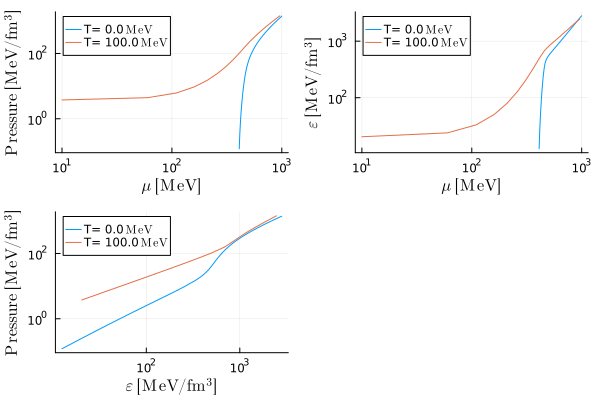

In [7]:
T_fixed = 0.0
mu_list = 4.1e2:3.0:1e3
plt1 = plot(mu_list, pressure.(T_fixed, mu_list)./(hbarc^3);
    label=string("T= ", T_fixed, L"\ \mathrm{MeV}"),
    xlabel=L"\mu\ [\mathrm{MeV}]",
    ylabel=L"\mathrm{Pressure}\ [\mathrm{MeV/fm^3}]",
    legend=:topleft,
    xscale=:log10,
    yscale=:log10,
)
plt2 = plot(mu_list, energy_dens.(T_fixed, mu_list)./(hbarc^3);
    label=string("T= ", T_fixed, L"\ \mathrm{MeV}"),
    xlabel=L"\mu\ [\mathrm{MeV}]",
    ylabel=L"\mathrm{Energy density}\ [\mathrm{MeV/fm^3}]",
    legend=:topleft,
    xscale=:log10,
    yscale=:log10,
)
plt3 = plot(energy_dens.(T_fixed, mu_list)./(hbarc^3), pressure.(T_fixed, mu_list)./(hbarc^3);
    label=string("T= ", T_fixed, L"\ \mathrm{MeV}"),
    xlabel=L"\epsilon\ [\mathrm{MeV/fm^3}]",
    ylabel=L"\mathrm{Pressure}\ [\mathrm{MeV/fm^3}]",
    legend=:topleft,
    xscale=:log10,
    yscale=:log10,
)

T_fixed = 1e2
mu_list = 1e1:50.0:1e3
plot!(plt1, mu_list, pressure.(T_fixed, mu_list)./(hbarc^3);
    label=string("T= ", T_fixed, L"\ \mathrm{MeV}"),
    xlabel=L"\mu\ [\mathrm{MeV}]",
    ylabel=L"\mathrm{Pressure}\ [\mathrm{MeV/fm^3}]",
    legend=:topleft,
    xscale=:log10,
    yscale=:log10,
)
plot!(plt2, mu_list, energy_dens.(T_fixed, mu_list)./(hbarc^3);
    label=string("T= ", T_fixed, L"\ \mathrm{MeV}"),
    xlabel=L"\mu\ [\mathrm{MeV}]",
    ylabel=L"\epsilon\ [\mathrm{MeV/fm^3}]",
    legend=:topleft,
    xscale=:log10,
    yscale=:log10,
)
plot!(plt3, energy_dens.(T_fixed, mu_list)./(hbarc^3), pressure.(T_fixed, mu_list)./(hbarc^3);
    label=string("T= ", T_fixed, L"\ \mathrm{MeV}"),
    xlabel=L"\epsilon\ [\mathrm{MeV/fm^3}]",
    ylabel=L"\mathrm{Pressure}\ [\mathrm{MeV/fm^3}]",
    legend=:topleft,
    xscale=:log10,
    yscale=:log10,
)
plot(plt1, plt2, plt3, layout=(2,2))

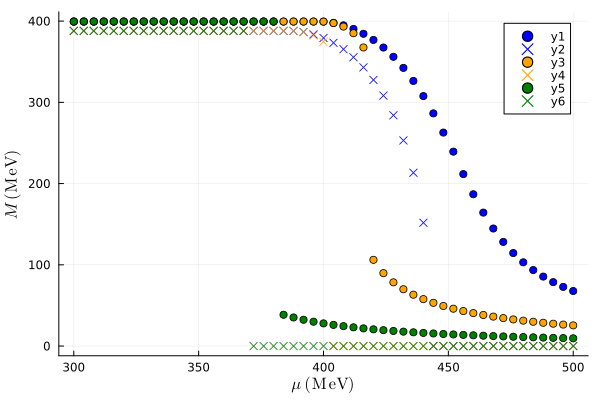

In [8]:
T_fix = 0.0
mu = 3e2:4.0:5e2

Gv = Gs
m = 5.6
M = [solve_system.(T_fix, mu)[i][1] for i in 1:length(mu)]
m = 0.0
M0 = [solve_system.(T_fix, mu)[i][1] for i in 1:length(mu)]
plt = scatter(mu, M; color=:blue,
    xlabel = L"\mu\ (\mathrm{MeV})",
    ylabel = L"M\ (\mathrm{MeV})",
)
scatter!(mu, M0; color=:blue, marker=:xcross)

Gv = Gs/2.0
m = 5.6
M = [solve_system.(T_fix, mu)[i][1] for i in 1:length(mu)]
m = 0.0
M0 = [solve_system.(T_fix, mu)[i][1] for i in 1:length(mu)]
scatter!(plt, mu, M; color=:orange)
scatter!(plt, mu, M0; color=:orange, marker=:xcross)

Gv = Gs*1e-3
m = 5.6
M = [solve_system.(T_fix, mu)[i][1] for i in 1:length(mu)]
m = 0.0
M0 = [solve_system.(T_fix, mu)[i][1] for i in 1:length(mu)]
scatter!(plt, mu, M; color=:green)
scatter!(plt, mu, M0; color=:green, marker=:xcross)

Gv = Gs
display(plt)

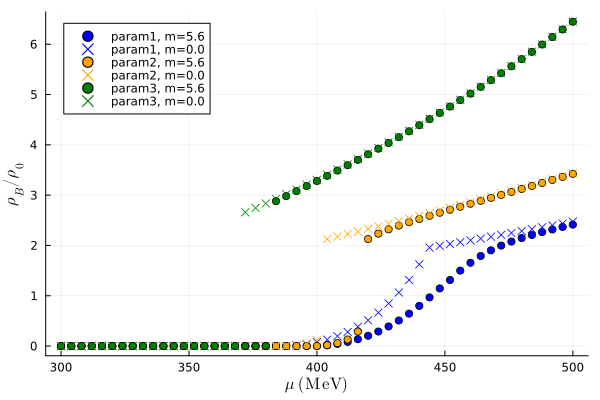

"/Users/mnmgchjsk/JupyterLab/NJLmodel/fig/example.png"

In [17]:
m = 5.6
Gv = Gs
plt = scatter(mu, rhoB.(T_fix, mu); color=:blue,
    label=string("param1, m=", m),
    xlabel=L"\mu\ (\mathrm{MeV})",
    ylabel=L"\rho_B/\rho_0",
)
m = 0.0
scatter!(plt, mu, rhoB.(T_fix, mu); 
    label=string("param1, m=", m),
    marker=:xcross, color=:blue)

m = 5.6
Gv = Gs/2.0
scatter!(plt, mu, rhoB.(T_fix, mu); 
    label=string("param2, m=", m),
    color=:orange)
m = 0.0
scatter!(plt, mu, rhoB.(T_fix, mu);
    label=string("param2, m=", m),
    marker=:xcross, color=:orange)

m = 5.6
Gv = Gs*1e-3
scatter!(plt, mu, rhoB.(T_fix, mu);
    label=string("param3, m=", m),
    color=:green)
m = 0.0
scatter!(plt, mu, rhoB.(T_fix, mu); 
    label=string("param3, m=", m),
    marker=:xcross, color=:green)

m = 5.6
display(plt)
# savefig(plt, "fig/example.png")

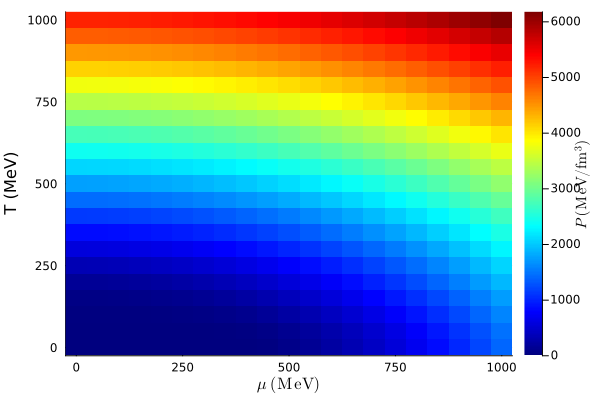

In [10]:
m = 5.6
Gv = Gs

T_vals = 0.0:5e1:1e3
mu_vals = 0.0:5e1:1e3

press_values = [-Omega(T, mu)/hbarc^3 for T in T_vals, mu in mu_vals]

heatmap(mu_vals, T_vals, press_values; 
    ylabel="T (MeV)",
    xlabel=L"\mu\ (\mathrm{MeV})", zlabel=L"Pressure\ (\mathrm{MeV/fm^3})", 
    color=:jet,
    colorbar_title = L"P\ (\mathrm{MeV/fm^3})",
)

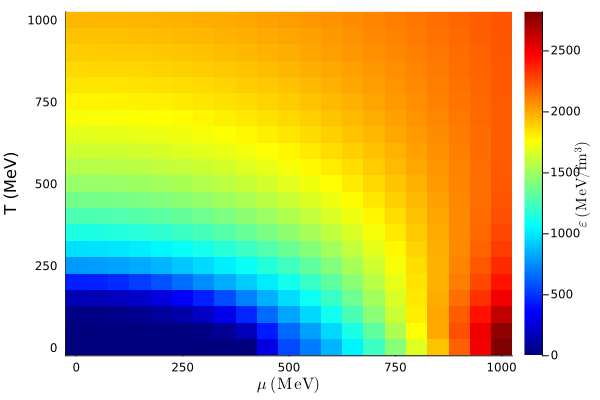

In [11]:
m = 5.6
Gv = Gs

T_vals = 0.0:5e1:1e3
mu_vals = 0.0:5e1:1e3

eps_values = [energy_dens(T, mu)/hbarc^3 for T in T_vals, mu in mu_vals]

# Plot 3D surface
heatmap(mu_vals, T_vals, eps_values; 
    ylabel="T (MeV)",
    xlabel=L"\mu\ (\mathrm{MeV})", zlabel=L"\epsilon\ (\mathrm{MeV/fm^3})", 
    color=:jet,
    colorbar_title = L"\epsilon\ (\mathrm{MeV/fm^3})",
)

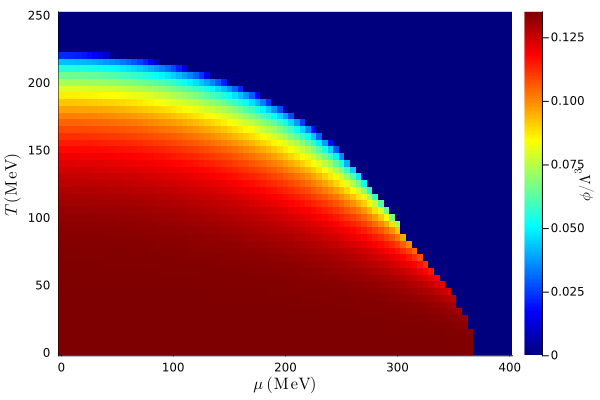

In [12]:
Gv = Gs*1e-3
m = 0.0

T_vals = 0.0:5.0:2.5e2
mu_vals = 0.0:5.0:4e2

phi_values = [(solve_system(T, mu)[1] - m)/(2.0*Gs*Lambda^3) for T in T_vals, mu in mu_vals]
heatmap(mu_vals, T_vals, phi_values; 
    ylabel=L"T\ (\mathrm{MeV})",
    xlabel=L"\mu\ (\mathrm{MeV})", 
    zlabel=L"\M\ (\mathrm{MeV})", 
    color=:jet,
    clim=(0, maximum(phi_values)),
    colorbar_title = L"\phi/\Lambda^3",
)

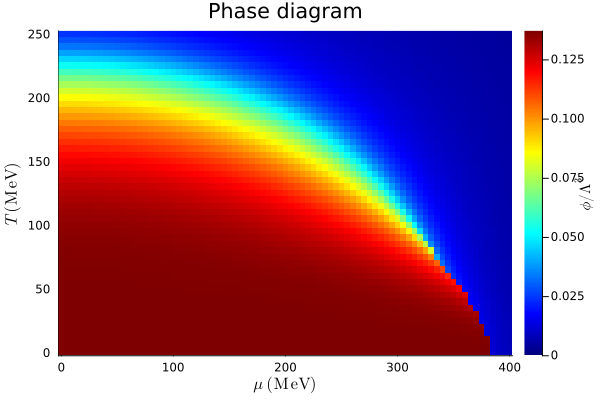

In [21]:
Gv = Gs*1e-3
m = 5.6

T_vals = 0.0:5.0:2.5e2
mu_vals = 0.0:5.0:4e2

phi_values = [(solve_system(T, mu)[1]-m)/(2.0*Gs*Lambda^3) for T in T_vals, mu in mu_vals]
plt = heatmap(mu_vals, T_vals, phi_values; 
    ylabel=L"T\ (\mathrm{MeV})",
    xlabel=L"\mu\ (\mathrm{MeV})", 
    zlabel=L"\M\ (\mathrm{MeV})", 
    color=:jet,
    clim=(0, maximum(phi_values)),
    colorbar_title = L"\phi/\Lambda^3",
    title="Phase diagram",
)

# savefig(plt, "fig/phase_diag.png")
display(plt)